!pip install matplotlib

In [4]:
%pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp310-cp310-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp310-cp310-macosx_10_9_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

Matplotlib is building the font cache; this may take a moment.


In [7]:
#importing real estate data for cleaning
df = pd.read_csv('/Users/stephenkeyen/Downloads/Functions 2/real-estate-hackathon.csv')

In [8]:
df.shape # Number of rows and Columns

(10029, 33)

In [12]:
import sys

if '/Users/stephenkeyen/Downloads/Functions 2' not in sys.path:
  sys.path.append('/Users/stephenkeyen/Downloads/Functions 2')

In [13]:
import function as fun

In [14]:
df.describe()

,unformattedPrice,addressZipcode,beds,baths,area,latitude,longitude
count,1.002900e+04,10029.000000,7324.000000,7088.000000,6965.000000,10018.000000,10018.000000
mean,4.109241e+05,49840.613920,3.104042,2.555213,2083.011486,1.828908,-4.565698
std,4.907368e+06,30071.131732,3.256203,3.873460,7708.910494,8.383204,21.287641
min,0.000000e+00,1.000000,0.000000,1.000000,1.000000,0.000000,-159.471639
25%,9.950000e+04,24588.000000,2.000000,2.000000,1200.000000,0.000000,0.000000
50%,2.190000e+05,48906.000000,3.000000,2.000000,1610.000000,0.000000,0.000000
75%,3.799000e+05,77493.000000,4.000000,3.000000,2206.000000,0.000000,0.000000
max,4.749000e+08,99921.000000,234.000000,100.000000,435600.000000,60.532777,0.000000


In [15]:
df.head(7)

,detailUrl,statusType,statusText,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,variableDataType,variableDataText,badgeInfo,pgapt,sgapt,zestimate,shouldShowZestimateAsPrice,has3DModel,isHomeRec,brokerName,hasAdditionalAttributions,isFeaturedListing,list,relaxed,hasOpenHouse,openHouseStartDate,openHouseEndDate,openHouseDescription
0,https://www.zillow.com/homedetails/315-Pine-Ri...,FOR_SALE,House for sale,"$349,999",0,"315 Pine Ridge Ave, Woodland Park, CO 80863",315 Pine Ridge Ave,Woodland Park,CO,80863,3.0,2.0,1055.0,0.0,0.0,DAYS_ON,2 days on Zillow,ForSale,For Sale (Broker),375500,FALSE,FALSE,False,NaN,TRUE,False,True,False,NaN,NaN,NaN,NaN,\r
1,https://www.zillow.com/homedetails/5510-Long-C...,FOR_SALE,Home for sale,"$193,999",0,"5510 Long Corner Rd, White Hall, MD 21161",5510 Long Corner Rd,White Hall,MD,21161,3.0,1.0,1074.0,0.0,0.0,DAYS_ON,16 days on Zillow,NaN,ForSale,For Sale (Broker),NaN,FALSE,False,FALSE,Berkshire Hathaway HomeServices Homesale Realty,True,False,True,False,NaN,NaN,NaN,NULL\r
2,https://www.zillow.com/homedetails/415-Jasper-...,FOR_SALE,Home for sale,"$79,999",0,"415 Jasper St, Post, TX 79356",415 Jasper St,Post,TX,79356,4.0,2.0,1872.0,0.0,0.0,DAYS_ON,25 days on Zillow,ForSale,For Sale (Broker),79400,FALSE,FALSE,False,NaN,TRUE,False,True,False,NaN,NaN,NaN,NaN,\r
3,https://www.zillow.com/homedetails/125-Blueste...,FOR_SALE,Townhouse for sale,"$289,987",0,"125 Bluestem Ct, Lebanon, TN 37090",125 Bluestem Ct,Lebanon,TN,37090,3.0,3.0,1650.0,0.0,0.0,OPEN_HOUSE,Open: Sun. 2-4pm,NaN,ForSale,For Sale (Broker),NaN,FALSE,False,FALSE,NaN,False,False,True,False,TRUE,2021-06-27T14:00:00,2021-06-27T16:00:00,Open House - 2:00 - 4:00 PM\r
4,https://www.zillow.com/homedetails/10918-NE-99...,FOR_SALE,Home for sale,"$68,999",0,"10918 NE 99th Cir #104, Vancouver, WA 98686",10918 NE 99th Cir #104,Vancouver,WA,98686,2.0,1.0,694.0,0.0,0.0,PRICE_REDUCTION,"$10,000 (Jun 15)",NaN,ForSale,For Sale (Broker),NaN,FALSE,False,FALSE,NaN,False,False,True,False,NaN,NaN,NaN,NULL\r
5,https://www.zillow.com/homedetails/LOT-310-Shi...,FOR_SALE,Lot / Land for sale,"$13,999",0,"LOT 310 Shiloh Falls Ct, Counce, TN 38326",LOT 310 Shiloh Falls Ct,Counce,TN,38326,NaN,NaN,NaN,0.0,0.0,DAYS_ON,8 days on Zillow,NaN,ForSale,For Sale (Broker),NaN,FALSE,False,FALSE,Duane Wright Realty,True,False,True,False,NaN,NaN,NaN,NULL\r
6,https://www.zillow.com/homedetails/940-Monika-...,FOR_SALE,House for sale,"$349,999",0,"940 Monika Way, Las Vegas, NV 89119",940 Monika Way,Las Vegas,NV,89119,4.0,2.0,2214.0,0.0,0.0,PRICE_REDUCTION,"$20,000 (Jun 14)",ForSale,For Sale (Broker),357000,FALSE,FALSE,False,Listing provided by GLVAR,TRUE,False,True,False,NaN,NaN,NaN,NaN,\r


## Dataset distribution

In [16]:
print(fun.metadata(df))

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object             0.00   10000            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object             0.00       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object             0.00      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3                        price   object             0.08    2018            NaN           NaN         NaN      NaN       NaN       NaN           NaN
4             unformattedPrice    int64             0.00    1803  410924.124539  4.907368e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
5                      address   object             3.73    9627            NaN           NaN         NaN 

## unique values

In [1]:
#iterate through the each columns for all the unique features
# for column in df.columns:
#   print(column, df[column].unique().tolist())

** using "Undisclosed" for missing values in PGAPt, sgapt, zestimate
** replace missing values in shouldShowZestimateAsPrice to "unknown"
** using "Undisclosed" for missing values in isHomeRec, brokerName
** using "None" for missing values in hasAdditionalAttributions, relaxed
** inputing "Undisclosed" for missing values in hasOpenHouse, openHouseStartDate, openHouseEndDate, openHouseDescription

In [19]:
%pip install missingno


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


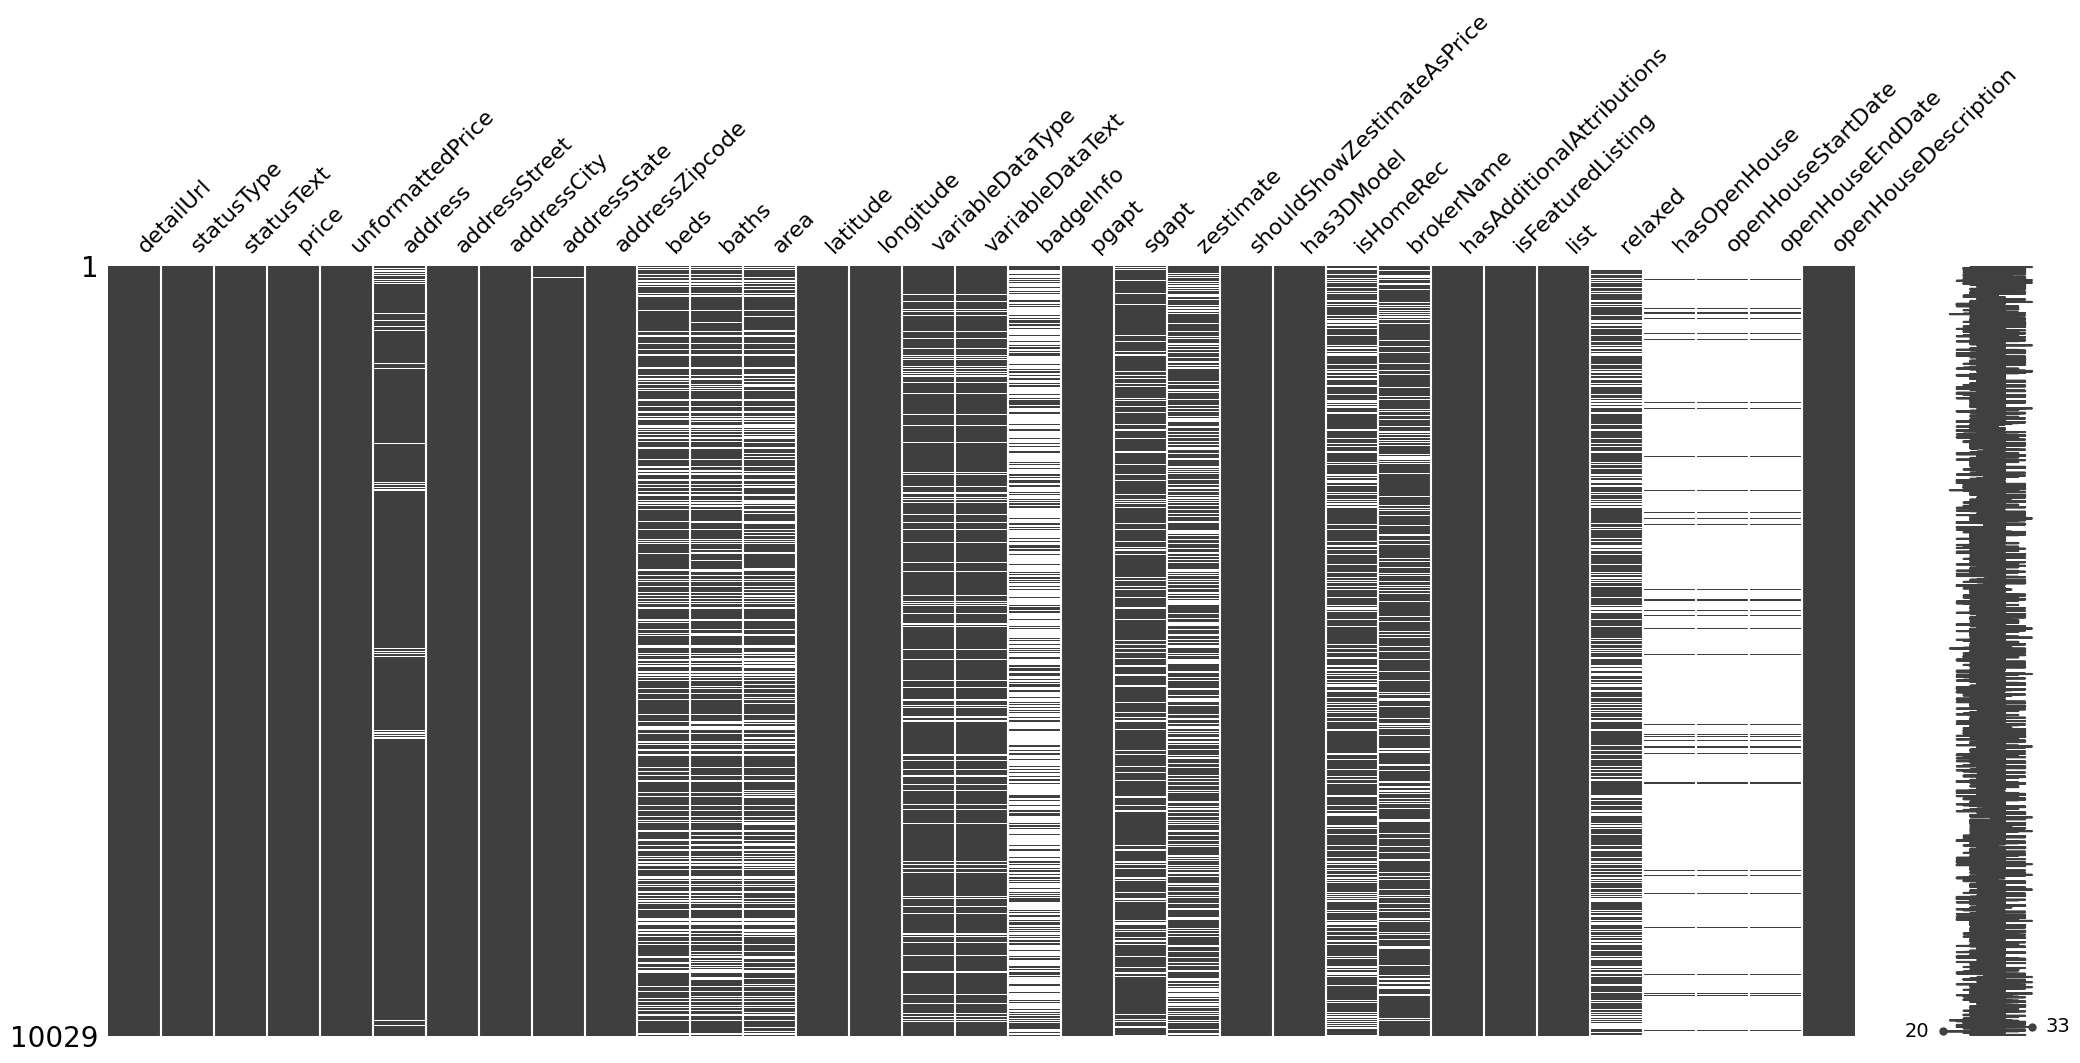

In [20]:
#visualization of the distribution of missing values to understand correlation
import missingno as msno
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()


In [21]:
columns_of_interest = ['address', 'addressStreet', 'addressCity', 'addressState']

In [2]:
# viewing all therecords with null values in the above list of columns of interest
# missing_records = df[df[columns_of_interest].isnull().any(axis=1)]
# print(missing_records)

In [23]:
df_2 = df.drop(['address', 'price'], axis=1) # dropping the irrelevant columsn due to the availabilty of similar columns with better data quality


In [26]:
print(fun.metadata(df_2)) #current data set distribution

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object             0.00   10000            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object             0.00       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object             0.00      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3             unformattedPrice    int64             0.00    1803  410924.124539  4.907368e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
4                addressStreet   object             0.01    9979            NaN           NaN         NaN      NaN       NaN       NaN           NaN
5                  addressCity   object             0.01    4095            NaN           NaN         NaN 

In [32]:
#with low missing count, dropping null values in these columns
df_2.dropna(subset=['addressStreet', 'addressCity', 'addressState'], inplace=True)

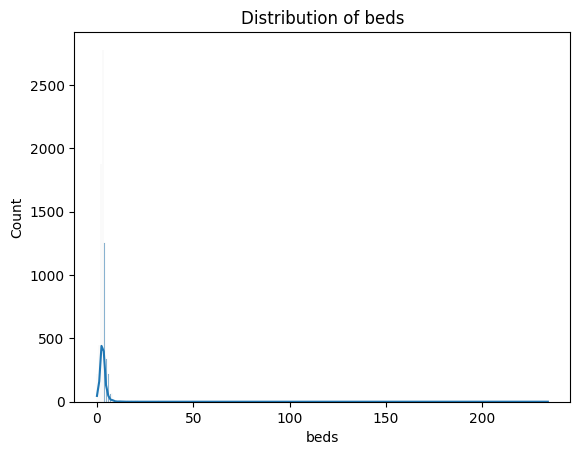

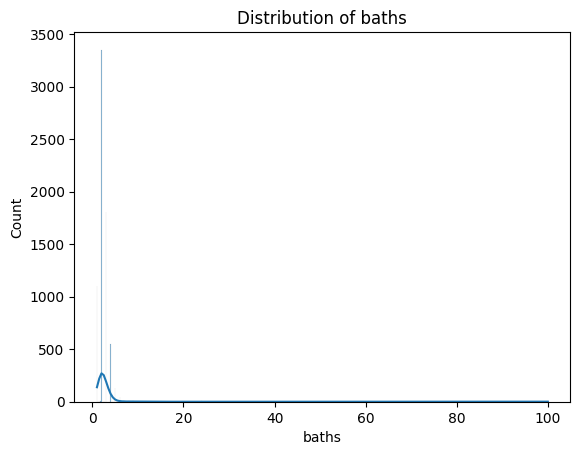

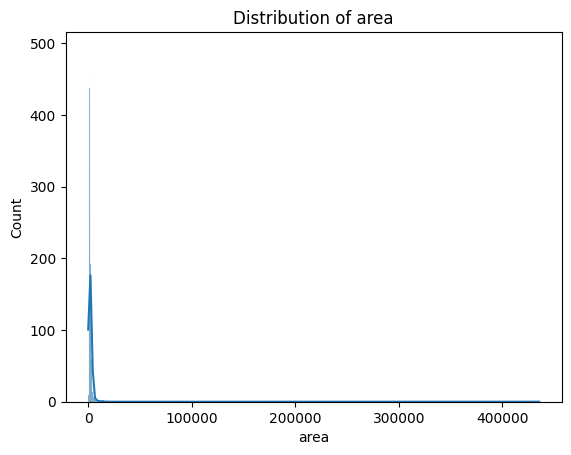

In [34]:
import seaborn as sns

for col in ['beds', 'baths', 'area']:
  sns.histplot(df_2[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

In [35]:
# df_2['beds']= df_3['beds'].astype('category')
#distribution of bed counts
df_2['beds'].value_counts()

beds
3.0      2777
2.0      1875
4.0      1251
1.0       446
5.0       334
6.0       219
0.0       218
8.0        69
7.0        63
9.0        20
10.0       11
12.0       11
13.0        4
24.0        4
11.0        4
21.0        3
20.0        3
32.0        2
18.0        2
16.0        2
14.0        1
30.0        1
22.0        1
34.0        1
234.0       1
23.0        1
Name: count, dtype: int64

In [38]:
maxBeds_df = df_2[(df_2['beds'] > 10)] #all the records with bed count above 10 to understand outliers

print(maxBeds_df)

# & (df_2['Baths'] > 10)

                                               detailUrl statusType                  statusText  unformattedPrice             addressStreet     addressCity addressState  addressZipcode   beds  baths     area   latitude   longitude variableDataType         variableDataText badgeInfo              pgapt              sgapt zestimate shouldShowZestimateAsPrice  has3DModel                                    isHomeRec                        brokerName hasAdditionalAttributions  isFeaturedListing   list relaxed hasOpenHouse   openHouseStartDate     openHouseEndDate               openHouseDescription
55     https://www.zillow.com/homedetails/515-4th-Ave...   FOR_SALE  Multi-family home for sale           1200000               515 4th Ave     Asbury Park           NJ            7712   20.0    9.0   6600.0  40.224257  -74.007225          DAYS_ON        18 days on Zillow   ForSale  For Sale (Broker)            1200000     FALSE                      FALSE       False                                

In [36]:
df_2['baths'].value_counts()

baths
2.00      3351
3.00      1802
1.00      1105
4.00       553
5.00       127
6.00        44
8.00        21
7.00        19
9.00        14
100.00      10
12.00       10
10.00        7
2.50         5
1.75         4
1.50         4
24.00        3
2.75         1
3.50         1
17.00        1
1.25         1
16.00        1
14.00        1
2.25         1
3.10         1
13.00        1
Name: count, dtype: int64

data standardization to be done - 
** drop null values in AddressStreet, AddressCity and AdressState, missing percent os 0.01 in each feature
** Use median imputer for beds and baths missing values, more consideration to be made after evaluating feature value distribution
** fill "unknown" for null long and lat 
** fill "undisclosed" in place of Naan for VariableDatatype and variableDataText 
** fill "undisclosed" for BadgeInfo
** using "Undisclosed" for missing values in PGAPt, sgapt, zestimate
** replace missing values in shouldShowZestimateAsPrice to "unknown"
** using "Undisclosed" for missing values in isHomeRec, brokerName
** using "None" for missing values in hasAdditionalAttributions, relaxed
** inputing "Undisclosed" for missing values in hasOpenHouse, openHouseStartDate, openHouseEndDate, openHouseDescription


In [40]:
df_2.dropna(subset=['addressStreet', 'addressCity', 'addressState'], inplace=True)

In [42]:
df_2['longitude'].fillna(-1, inplace=True)
df_2['latitude'].fillna(-1, inplace=True)
df_2['variableDataType'].fillna('undisclosed', inplace=True)
df_2['variableDataText'].fillna('undisclosed', inplace=True)
df_2['badgeInfo'].fillna('undisclosed', inplace=True)
df_2['shouldShowZestimateAsPrice'].fillna('unknown', inplace=True)

/var/folders/qv/_2pcj0wj46q5fgp7hmrndz2c0000gp/T/ipykernel_89074/1898557206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['longitude'].fillna(-1, inplace=True)
/var/folders/qv/_2pcj0wj46q5fgp7hmrndz2c0000gp/T/ipykernel_89074/1898557206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [43]:
for col in ['PGAPt', 'sgapt', 'zestimate', 'isHomeRec', 'brokerName', 'hasOpenHouse', 'openHouseStartDate', 'openHouseEndDate', 'openHouseDescription' ]:
  df_2.fillna({col:'Undisclosed'}, inplace=True)

In [44]:
for col in ['hasAdditionalAttributions', 'relaxed']:
  df_2.fillna({col:'None'}, inplace=True)

In [45]:
print(fun.metadata(df_2))

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object             0.00    9997            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object             0.00       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object             0.00      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3             unformattedPrice    int64             0.00    1803  411019.753142  4.908099e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
4                addressStreet   object             0.00    9977            NaN           NaN         NaN      NaN       NaN       NaN           NaN
5                  addressCity   object             0.00    4095            NaN           NaN         NaN 

In [47]:
#understanding outlier region using interquartile ranges and dropping outliers disrupting data distribution for future KD & ML
for col in ['beds', 'baths']:
    Q1 = df_2[col].quantile(0.25)
    Q3 = df_2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
df_main = df_2[(df_2[col] >= lower_bound) & (df_2[col] <= upper_bound)]

In [48]:
print(fun.metadata(df_main))

                   column_name datatype  missing_percent  unique           mean           std          min       25%       50%       75%           max
0                    detailUrl   object             0.00    6810            NaN           NaN          NaN       NaN       NaN       NaN           NaN
1                   statusType   object             0.00       1            NaN           NaN          NaN       NaN       NaN       NaN           NaN
2                   statusText   object             0.00      23            NaN           NaN          NaN       NaN       NaN       NaN           NaN
3             unformattedPrice    int64             0.00    1417  421915.218919  5.768994e+06     0.000000  165000.0  269900.0  420000.0  4.749000e+08
4                addressStreet   object             0.00    6801            NaN           NaN          NaN       NaN       NaN       NaN           NaN
5                  addressCity   object             0.00    2920            NaN           NaN 

In [56]:
default_bath = df_2['baths'].median()
df_2['baths'].fillna(default_bath, inplace=True)
#filling null values for baths column in median of data distribution after dropping outliers


/var/folders/qv/_2pcj0wj46q5fgp7hmrndz2c0000gp/T/ipykernel_89074/1656245483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['baths'].fillna(default_bath, inplace=True)


In [57]:
valid = df_2[df_2['beds'].notnull() & df_2['baths'].notnull() & (df_2['beds'] > 0)]
bath_bed_ratio = (valid['baths'] / valid['beds']).median()
# important to factor the bed to bath ratio when filling missing values in the bed and baths column as that is relative to each house, 
# majority of houses have a proportional balance between beds and baths, hence the above ode to fill missing bath values

In [58]:
df_2['baths'] = df_2['baths'].fillna(df_2['beds'] * bath_bed_ratio) #filling missing baths with bath_bed ratio consideration
df_2['baths'] = df_2['baths'].round(1) # rounding up bath values for better data representation 

In [60]:
print(fun.metadata(df_2)) #Current data distribution

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object             0.00    9997            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object             0.00       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object             0.00      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3             unformattedPrice    int64             0.00    1803  411019.753142  4.908099e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
4                addressStreet   object             0.00    9977            NaN           NaN         NaN      NaN       NaN       NaN           NaN
5                  addressCity   object             0.00    4095            NaN           NaN         NaN 

In [61]:
bed_bath_ratio = (valid['beds'] / valid['baths']).median()
df_2['beds'] = df_2['beds'].fillna(df_2['baths'] * bed_bath_ratio).round(1) #filling missing baths with beds_bath ratio consideration, also rounding up the inputs 


In [62]:
print(fun.metadata(df_2)) # current data distribution

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object             0.00    9997            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object             0.00       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object             0.00      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3             unformattedPrice    int64             0.00    1803  411019.753142  4.908099e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
4                addressStreet   object             0.00    9977            NaN           NaN         NaN      NaN       NaN       NaN           NaN
5                  addressCity   object             0.00    4095            NaN           NaN         NaN 

In [63]:
area_medians = df_2.groupby(['beds', 'baths'])['area'].median().reset_index() 
""" 
missing House area is a tricky column to input missing values, but 30% mising data wouldn't be good to drop, 
the bed and baths columns are the closest with any information that influences the area of the house, we use this logic to input the missing area values 
"""

In [64]:
df_2 = df_2.merge(area_medians, on=['beds', 'baths'], how='left', suffixes=('', '_median')) #creating a column of Areas based on the Area of values with similar combination of beds and baths
df_2['area'] = df_2['area'].fillna(df_2['area_median']) # filling the missing area values with the same number of beds and baths, created from the Area median feature created in the line above
df_2.drop(columns='area_median', inplace=True) # after filling values the created column can be dropped 



In [66]:
df_2.fillna({'pgapt':'Undisclosed'}, inplace=True)

In [67]:
print(fun.metadata(df_2))

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object             0.00    9997            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object             0.00       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object             0.00      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3             unformattedPrice    int64             0.00    1803  411019.753142  4.908099e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
4                addressStreet   object             0.00    9977            NaN           NaN         NaN      NaN       NaN       NaN           NaN
5                  addressCity   object             0.00    4095            NaN           NaN         NaN 

In [69]:
missing_records = df_2[df_2['area'].isnull()] # the area columns with no matching beds and baths are left null and are printed below
print(missing_records)# the missing values are about %0.09 of the area feature so they would be dropped

                                              detailUrl statusType                  statusText  unformattedPrice                      addressStreet   addressCity addressState  addressZipcode   beds  baths  area  latitude  longitude variableDataType   variableDataText    badgeInfo              pgapt              sgapt    zestimate shouldShowZestimateAsPrice  has3DModel                        isHomeRec                     brokerName hasAdditionalAttributions  isFeaturedListing   list relaxed hasOpenHouse openHouseStartDate openHouseEndDate openHouseDescription
270   https://www.zillow.com/homedetails/145-147-W-B...   FOR_SALE  Multi-family home for sale            875000             145-147 W Buttercup Rd      Wildwood           NJ            8260   10.0    5.0   NaN       0.0        0.0          DAYS_ON   2 days on Zillow      ForSale  For Sale (Broker)             875000        FALSE                      FALSE       False                      Undisclosed                           TRUE 

In [70]:
df_2 = df_2[df_2['area'].notnull()] # dropping the records with null area values

In [71]:
print(fun.metadata(df_2)) # final data distribution

                   column_name datatype  missing_percent  unique           mean           std         min      25%       50%       75%           max
0                    detailUrl   object              0.0    9988            NaN           NaN         NaN      NaN       NaN       NaN           NaN
1                   statusType   object              0.0       2            NaN           NaN         NaN      NaN       NaN       NaN           NaN
2                   statusText   object              0.0      24            NaN           NaN         NaN      NaN       NaN       NaN           NaN
3             unformattedPrice    int64              0.0    1802  411140.127284  4.910294e+06    0.000000  99500.0  219000.0  379900.0  4.749000e+08
4                addressStreet   object              0.0    9968            NaN           NaN         NaN      NaN       NaN       NaN           NaN
5                  addressCity   object              0.0    4094            NaN           NaN         NaN 

## Data quality improved and ready for Knowledge Discovery and Machine Learning